In [65]:
#Import all the necessary packages here
import pandas as pd
from pandas.core import datetools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
import statsmodels
from statsmodels.tsa.stattools import adfuller

#from matplotlib.pylab import rcParams
#rcParams['figure.figsize'] = 15,6

In [66]:
# this is for 
#1. checking the dataframe values
#2. Feed the delimiter character to the 
#3. Assignt the values under columns

df1= pd.read_csv("/home/sdi/cpu-nw.txt",sep = ';',names = ["Timeframe","Symbol","Metric"])
# Take only one VM as of now as it disturbs the order of the timeseries.
df2 = df1.loc[lambda df: df.Symbol== 'vmy2954']
#Drop Symbol column as it doesn't really matter anymore since we filtered out only one VM
df3 = df2.drop('Symbol',axis=1)

df3


,Timeframe,Metric
1,2018-02-16 16:11:44,26.00
3,2018-02-16 16:11:55,37.81
5,2018-02-16 16:12:06,35.82
7,2018-02-16 16:12:17,26.87
9,2018-02-16 16:12:28,24.62
11,2018-02-16 16:12:39,30.85
13,2018-02-16 16:12:50,32.50
15,2018-02-16 16:13:01,32.34
17,2018-02-16 16:13:12,27.50
19,2018-02-16 16:13:23,27.64


In [109]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S')
df = pd.read_csv("/home/sdi/cpu-24.txt",sep = ";",names = ["TimeFrame","Symbol","Metric"],index_col='TimeFrame',date_parser=dateparse)
#convert the time column in datetime format
df4 = df.loc[lambda df: df.Symbol== 'vmy2954']
df4 = df4.drop('Symbol',axis=1)
df4.resample("1Min").mean()
df4

,Metric
TimeFrame,
2018-02-12 14:42:28,26.87
2018-02-12 14:42:39,24.38
2018-02-12 14:42:50,34.67
2018-02-12 14:43:01,32.50
2018-02-12 14:43:12,48.24
2018-02-12 14:43:23,64.82
2018-02-12 14:43:34,73.13
2018-02-12 14:43:45,69.65
2018-02-12 14:43:56,69.35


In [110]:
import rpy2.ipython

In [74]:
from rpy2.robjects.packages import _get_namespace
from rpy2.rinterface import RRuntimeError
from rpy2.rinterface import NARealType
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
pandas2ri.activate()


In [77]:
ts=ro.r('ts')
forecast = importr('forecast')
ggplot = importr('ggplot2')
t_series = importr('tseries')
stats = importr('stats')

In [78]:
%R require(ggplot2)
%reload_ext rpy2.ipython

In [215]:
%%R
df3$Timeframe <-strptime(df3$Timeframe,"%Y-%m-%d %H:%M:%S")
str(df3$Timeframe )

 POSIXlt[1:7960], format: "2018-02-12 14:42:28" "2018-02-12 14:42:39" "2018-02-12 14:42:50" ...


In [247]:

%%R
library(lubridate)
r_date <-as.double(strptime(df3$Timeframe),"%Y-%m-%d %H:%M:%S")
r_metric <- as.numeric(df3$Metric)
#r_date <- as.Date(as.character(df3$Timeframe), "%Y-%m-%d %H:%M:%S")
str(df3)


Error in strptime(df3$Timeframe) : 
  argument "format" is missing, with no default


/usr/local/lib/python3.5/dist-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Error in strptime(df3$Timeframe) : 
  argument "format" is missing, with no default

  warnings.warn(x, RRuntimeWarning)


In [263]:
%%R
library(xts)

r_data <- xts(order.by=as.POSIXct(r_date),r_metric)
class(r_data)

[1] "xts" "zoo"


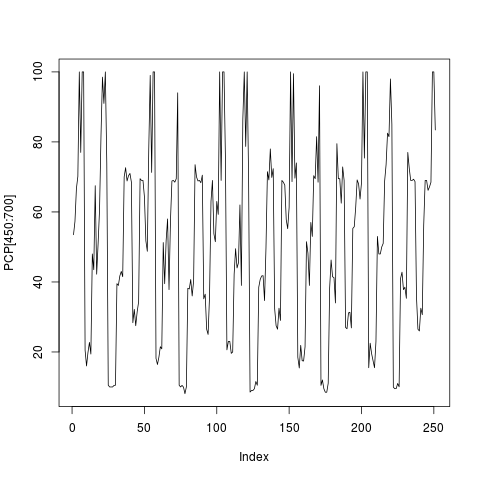

In [298]:
%%R
library(ggplot2)
PCP <- ts(r_data, frequency = 24*60*60/10, start = c(2018-02-12))
#plot(r_data, major.format = TRUE)
#plot(as.xts(r_data))
plot(PCP[450:700],type = 'l')
